# UberEats配達データ分析

In [189]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [164]:
print(len(master))
# master.head(5)

82


In [165]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_time',
       'month', 'pickup_address', 'pickup_latitude', 'pickup_longitude',
       'pickup_time', 'price', 'url', 'year'],
      dtype='object')

In [178]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'month', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time'], axis=1)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 32a0d360-68c1-436d-ad1d-f8c0f7b94f04
Data columns (total 6 columns):
distance            82 non-null float64
drive_time          82 non-null float64
price               82 non-null int64
pickup_datetime     82 non-null datetime64[ns]
drop_datetime       82 non-null datetime64[ns]
shop_position_id    82 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 4.5+ KB


In [184]:
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour

In [185]:
df.head(3)

,distance,drive_time,price,pickup_datetime,drop_datetime,shop_position_id,day_of_week_num,day_of_week,month_day_num,hour_of_day
id,,,,,,,,,,
d92f23b6-46a8-48d7-823c-8cadb9182193,0.51,7.6,401,2019-12-26 13:52:00,2019-12-26 14:07:00,35.58022689819336-139.66342163085938,3,Thursday,26,13
d9401bf2-68ed-42ee-8325-1f2698c1e86f,3.59,27.6,584,2019-12-26 17:12:00,2019-12-26 17:42:00,35.565433502197266-139.65289306640622,3,Thursday,26,17
8cd65eff-a081-47ee-a6e1-82ebc00f066a,2.29,26.1,666,2019-12-26 12:58:00,2019-12-26 13:34:00,35.5733528137207-139.65725708007812,3,Thursday,26,12


## 毎日のデータ集計

In [149]:
target_day = datetime.datetime(2019, 12, 26)
# target_day = datetime.datetime.today
df_day = df[df["date"] == target_day]

In [150]:
df_day

,date,day_of_week,distance,drive_time,drop_time,pickup_time,price,shop_position_id
id,,,,,,,,
d92f23b6-46a8-48d7-823c-8cadb9182193,2019-12-26,木,0.51,7.6,14:07,13:52,401,35.58022689819336-139.66342163085938
d9401bf2-68ed-42ee-8325-1f2698c1e86f,2019-12-26,木,3.59,27.6,17:42,17:12,584,35.565433502197266-139.65289306640622
8cd65eff-a081-47ee-a6e1-82ebc00f066a,2019-12-26,木,2.29,26.1,13:34,12:58,666,35.5733528137207-139.65725708007812
7b26ed4e-ac86-4e0a-b011-c552de346bf1,2019-12-26,木,0.53,10.0,16:44,16:23,362,35.56500625610352-139.654541015625
9cef32e6-4028-4e0e-8b08-0f65f43173aa,2019-12-26,木,2.53,19.0,18:55,18:22,701,35.58759307861328-139.63053894042972
a311f2cf-256a-466e-8a68-69da679ed678,2019-12-26,木,4.31,28.0,12:59,12:21,627,35.577117919921875-139.65669250488278
bdeaef46-5227-4ad0-9db0-296daad13c44,2019-12-26,木,0.82,10.5,16:25,16:04,377,35.56472396850586-139.65451049804688
90a6c393-b97b-4070-97c6-542f86fb96d9,2019-12-26,木,1.96,16.9,11:05,10:40,438,35.57533645629883-139.65950012207028
c34761f8-7d9d-4fd4-a2ab-495973ee3146,2019-12-26,木,2.22,23.2,18:14,17:49,622,35.58682632446289-139.62971496582028


In [151]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()

In [152]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円".format(target_day.date(), drive_count, drive_hours, drive_length, total_price))

2019-12-26  配達件数: 9件, 配達時間: 2.8h, 配達距離: 18.76km, 配達報酬: 4778円


## 日別の集計

## 週別の集計

## 月別の集計

## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

/home/tsu-nera/miniconda3/envs/ubereats/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tsu-nera/miniconda3/envs/ubereats/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)


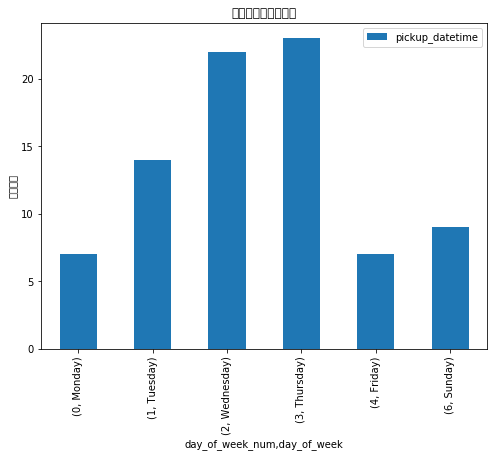

In [194]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

In [196]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/tsu-nera/miniconda3/envs/ubereats/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [197]:
import matplotlib as mpl
mpl.get_configdir()

'/home/tsu-nera/.config/matplotlib'